## Investigating Simpson Paradox

In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
plt.style.use('ggplot')

In [3]:
#read csv file
sp= pd.read_csv('UCBAdmissions.csv')

In [4]:
#visualize
sp

,Unnamed: 0,Admit,Gender,Dept,Freq
0,1,Admitted,Male,A,512
1,2,Rejected,Male,A,313
2,3,Admitted,Female,A,89
3,4,Rejected,Female,A,19
4,5,Admitted,Male,B,353
5,6,Rejected,Male,B,207
6,7,Admitted,Female,B,17
7,8,Rejected,Female,B,8
8,9,Admitted,Male,C,120
9,10,Rejected,Male,C,205


### Data Exploration

### 1. Percentage of Male and Female that applied

In [6]:
#partition into male and female gender
male= sp.loc[sp['Gender'] == 'Male']
Female= sp.loc[sp['Gender'] == 'Female']
#sizes of male and female gender
size=[sum(male['Freq']),sum(Female['Freq'])]

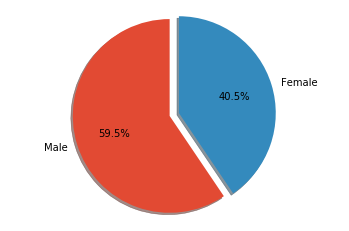

In [7]:
#visualizing the portion of male and female
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
explode = (0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 2. Percentage of Male and Female that were admitted

In [10]:
Admitted_male= male.loc[male['Admit'] == 'Admitted']
Admitted_Female= Female.loc[Female['Admit'] == 'Admitted']
Admit_size=[sum(Admitted_male['Freq']),sum(Admitted_Female['Freq'])]

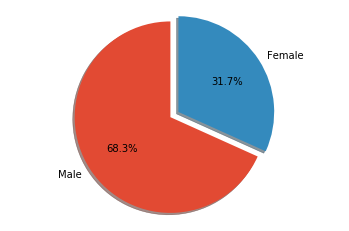

In [11]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
explode = (0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(Admit_size, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

This was the reason why the data was assumed to the biased against women. However, if we search deeper, we find something interesting. Next, we will seperate the data based on the departments.

In [12]:
L=[]
for i in (sp['Dept'].unique()):
    #separating based on specific information
    All_applicant= sp.loc[sp['Dept'] == i]
    Men_applicant= male.loc[male['Dept'] == i]
    Men_admitted= Men_applicant.loc[Men_applicant['Admit'] == 'Admitted']
    Men_acc_percent= np.round((sum(Men_admitted.Freq)/sum(Men_applicant.Freq))*100)
    
    Female_applicant= Female.loc[Female['Dept'] == i]
    Female_admitted= Female_applicant.loc[Female_applicant['Admit'] == 'Admitted']
    Female_acc_percent= np.round((sum(Female_admitted.Freq)/sum(Female_applicant.Freq))*100)
    
    # transfering all data to a dictionary
    n={'Department': i, 'Total Applicants': sum(All_applicant.Freq),
      'Male Applicant': sum(Men_applicant.Freq),
      'Male Admitted': sum(Men_admitted.Freq),
      'Male acceptance Rate': (str(Men_acc_percent)+'%'),
      'Female Applicant': sum(Female_applicant.Freq),
      'Female Admitted': sum(Female_admitted.Freq),
      'Female acceptance Rate': (str(Female_acc_percent) + '%'),
      'Acceptance Rate': str(np.round((sum((All_applicant.loc[All_applicant['Admit'] == 'Admitted']).Freq)/sum(All_applicant.Freq))*100))+ '%'
      }
    L.append(n)
    

In [13]:
# creation of dataframe
K=pd.DataFrame(L)

In [14]:
# visualize
K

,Department,Total Applicants,Male Applicant,Male Admitted,Male acceptance Rate,Female Applicant,Female Admitted,Female acceptance Rate,Acceptance Rate
0,A,933,825,512,62.0%,108,89,82.0%,64.0%
1,B,585,560,353,63.0%,25,17,68.0%,63.0%
2,C,918,325,120,37.0%,593,202,34.0%,35.0%
3,D,792,417,138,33.0%,375,131,35.0%,34.0%
4,E,584,191,53,28.0%,393,94,24.0%,25.0%
5,F,714,373,22,6.0%,341,24,7.0%,6.0%


We see that in four departments, the female acceptance rate is higher than that of the male acceptance rate. This is an example of the phenomenon called simpson's paradox. Next, we introduce ways on how to detect the simpson paradox

In [19]:
# generating the p value and chisquare result to the data
chisquare([1198, 557])

Power_divergenceResult(statistic=234.12022792022793, pvalue=7.530493629055113e-53)

We define a null hypothesis $H_{0}$ that men and women admitted are equally independent with 5% significance ($\alpha = 0.05$). The above result rejects $H_{0}$

In [20]:
List=[]
# generating the p value and chisquare result for all deparment
for h,i,j in zip(K['Department'],K['Male Admitted'],K['Female Admitted']):
    alpha=0.05
    p=(chisquare([i,j]))
    v=(chisquare([j,i]))
    if p[1]>=alpha:
        Result='fail to reject Ho'
    else:
        Result='reject Ho'
    n= {'Department':h, 'No of Sample': i+j, 'df':0,'Chi-square':p[0],'p-value':p[1],'ff-value':v[1], 'Chi-square Test result': Result}
    List.append(n)
#creating dataframe
B=pd.DataFrame(List)
#visualize
B

,Department,No of Sample,df,Chi-square,p-value,ff-value,Chi-square Test result
0,A,601,0,297.718802,1.034603e-66,1.034603e-66,reject Ho
1,B,370,0,305.124324,2.519908e-68,2.519908e-68,reject Ho
2,C,322,0,20.881988,4.884663e-06,4.884663e-06,reject Ho
3,D,269,0,0.182156,6.695268e-01,6.695268e-01,fail to reject Ho
4,E,147,0,11.435374,7.205896e-04,7.205896e-04,reject Ho
5,F,46,0,0.086957,7.680826e-01,7.680826e-01,fail to reject Ho


Based on the subgroups, we detected that some subgroups rejected $H_{0}$ while some failed to reject $H_{0}$ which shows inconsistency.